In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
from IPython.display import display
import ipywidgets as widgets


class DataExplorer:
    def __init__(self, df=None, filename=None):
        if filename:
            self.df = pd.read_csv(filename)
        elif df is not None:
            self.df = df
            
    def head(self, n=5):
        display(self.df.head(n))

    def tail(self, n=5):
        return self.df.tail(n)

    def shape(self):
        return self.df.shape
        
    def columns(self):
        return self.df.columns

    def info(self):
        return self.df.info()

    def describe(self):
        return self.df.describe(include='all')

    def data_types(self):
        return self.df.dtypes

    def unique_counts(self):
        return self.df.nunique()

    def statistics(self):
        return self.df.describe()

    def categorical_summary(self):
        return self.df.describe(include='object')

    
    def find_null(self):
        return self.df.isnull().sum()

    def null_percentage(self):
        return (self.df.isnull().mean() * 100).round(2)

    def fillna_with_mode(self, col):
        if self.df[col].isnull().sum() > 0:
            mode_val = self.df[col].mode()[0]
            self.df[col] = self.df[col].fillna(mode_val)


    def drop_nulls(self):
        self.df.dropna(inplace=True)

    def find_duplicated(self):
        return self.df[self.df.duplicated()]

    def drop_duplicates(self):
        self.df.drop_duplicates(inplace=True)

    
    def drop_column(self, col):
        self.df.drop(columns=[col], inplace=True)

    def filter_rows(self, condition):
        return self.df.query(condition)

    def convert_dtype(self, col, dtype):
        self.df[col] = self.df[col].astype(dtype)

    def detect_outlier(self, column_name):
        if column_name not in self.df.columns:
            raise ValueError(f"{column_name} not found in DataFrame.")
        col = pd.to_numeric(self.df[column_name], errors='coerce').dropna()
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_val = col.mean()
        print(f"Lower Bound: {lower_bound} and Upper Bound: {upper_bound} and Mean: {mean_val}")
        outliers = self.df[(self.df[column_name] < lower_bound) |
                           (self.df[column_name] > upper_bound)]
        return outliers[column_name].tolist()


    
    def plot_distribution(self, column):
        plt.figure(figsize=(8, 4))
        sns.histplot(self.df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

    def plot_count(self, column):
        plt.figure(figsize=(8, 4))
        sns.countplot(x=self.df[column])
        plt.title(f"Count Plot of {column}")
        plt.xticks(rotation=45)
        plt.show()

    def box_plots(self, name):
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=self.df[name], color='skyblue')
        plt.title(f'Boxplot of {name}')
        plt.ylabel(name)
        plt.tight_layout()
        plt.show()



    def plot_pie(self, column):
        self.df[column].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6), title=f"Pie Chart of {column}")
        plt.ylabel('')
        plt.show()

    def plot_bar(self, column):
        self.df[column].value_counts().plot.bar(figsize=(8, 4), title=f"Bar Chart of {column}")
        plt.xticks(rotation=45)
        plt.show()

    def plot_kde(self, column):
        plt.figure(figsize=(8, 4))
        sns.kdeplot(self.df[column], shade=True)
        plt.title(f"KDE Plot of {column}")
        plt.show()

    
    def plot_scatter(self, x, y):
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=self.df[x], y=self.df[y])
        plt.title(f"Scatter Plot: {x} vs {y}")
        plt.show()

    def plot_line(self, x, y):
        plt.figure(figsize=(8, 4))
        sns.lineplot(x=self.df[x], y=self.df[y])
        plt.title(f"Line Plot: {x} vs {y}")
        plt.show()

    def plot_stacked_bar(self, col1, col2):
        pd.crosstab(self.df[col1], self.df[col2]).plot(kind="bar", stacked=True, figsize=(10, 6))
        plt.title(f"Stacked Bar Plot: {col1} vs {col2}")
        plt.show()

    def plot_violin(self, x, y):
        plt.figure(figsize=(8, 4))
        sns.violinplot(x=self.df[x], y=self.df[y])
        plt.title(f"Violin Plot: {x} vs {y}")
        plt.show()

    def plot_strip(self, x, y):
        plt.figure(figsize=(8, 4))
        sns.stripplot(x=self.df[x], y=self.df[y], jitter=True)
        plt.title(f"Strip Plot: {x} vs {y}")
        plt.show()

    def plot_swarm(self, x, y):
        plt.figure(figsize=(8, 4))
        sns.swarmplot(x=self.df[x], y=self.df[y])
        plt.title(f"Swarm Plot: {x} vs {y}")
        plt.show()

    

    def correlation_heatmap(self):
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df.corr(numeric_only=True), annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()

    
    def chi_square(self, col1, col2):
        table = pd.crosstab(self.df[col1], self.df[col2])
        _, p, _, _ = chi2_contingency(table)
        return p

    def continuous_vs_continuous_correlation(self):
        corr_matrix = self.df.select_dtypes(include=['int64', 'float64']).corr()
        correlated_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i, j]
                correlated_pairs.append((col1, col2, corr_value))
        return sorted(correlated_pairs, key=lambda x: abs(x[2]), reverse=True)

    def anova_test(self, target):
        if target not in self.df.columns:
            raise ValueError(f"{target} not found in DataFrame.")

        continuous_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        categorical_cols = self.df.select_dtypes(include='object').columns
        results = []

        for cat in categorical_cols:
            if self.df[cat].nunique() > 1:
                groups = [group[target].dropna().values
                          for _, group in self.df.groupby(cat) if len(group[target].dropna()) > 1]
                if len(groups) > 1:
                    stat, p = f_oneway(*groups)
                    results.append({'Feature': cat, 'ANOVA_p_value': round(p, 4)})
        return pd.DataFrame(results)

    def t_test(self, cat_col, target):
        groups = self.df[cat_col].dropna().unique()
        if len(groups) != 2:
            raise ValueError("T-test is only applicable for binary categorical variables")

        group1 = self.df[self.df[cat_col] == groups[0]][target].dropna()
        group2 = self.df[self.df[cat_col] == groups[1]][target].dropna()
        stat, p = ttest_ind(group1, group2)
        return p
        
    def save_to_csv(self, filename):
        self.df.to_csv(filename, index=False)




In [19]:
analysis=DataExplorer(filename="insurance_claims.csv")

In [3]:
analysis.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
analysis.shape()

(1000, 39)

In [7]:
analysis.columns()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [5]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
analysis.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,01-01-2006,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


In [7]:
analysis.data_types()

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
analysis.unique_counts()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
analysis.find_null()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [10]:
analysis.null_percentage()

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          9.1
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

In [11]:
analysis.fillna_with_mode('authorities_contacted')

In [12]:
analysis.find_duplicated()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [13]:
analysis.detect_outlier("total_claim_amount")

Lower Bound: -1357.5 and Upper Bound: 113762.5 and Mean: 52761.94


[114920]

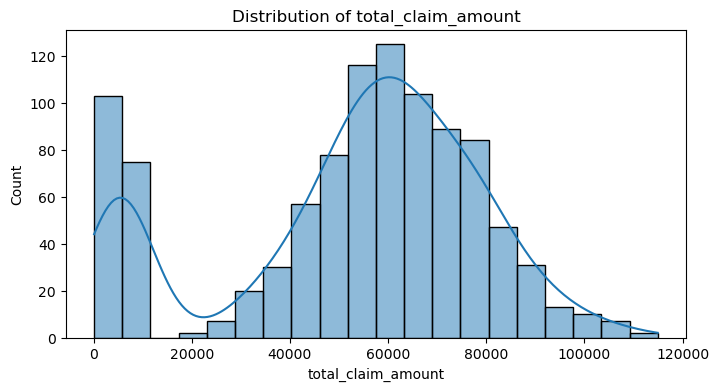

In [14]:
analysis.plot_distribution("total_claim_amount")

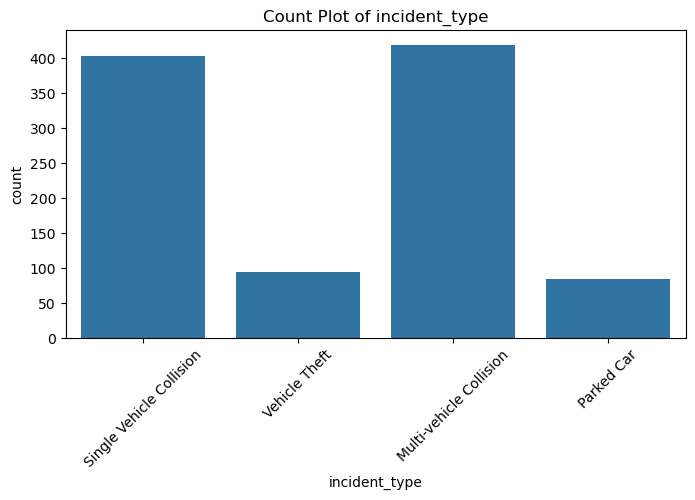

In [15]:
analysis.plot_count("incident_type")

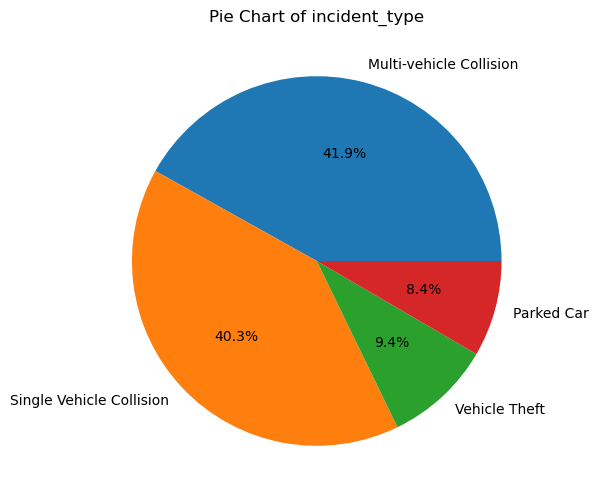

In [16]:
analysis.plot_pie("incident_type")

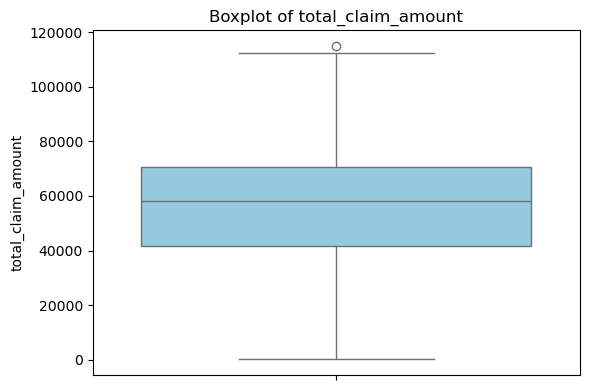

In [17]:
analysis.box_plots("total_claim_amount")

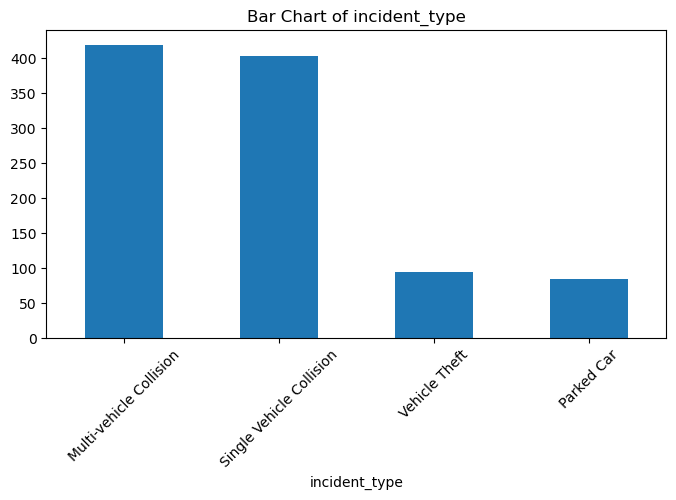

In [18]:
analysis.plot_bar("incident_type")

C:\Users\HP\AppData\Local\Temp\ipykernel_12472\2863073210.py:128: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(self.df[column], shade=True)


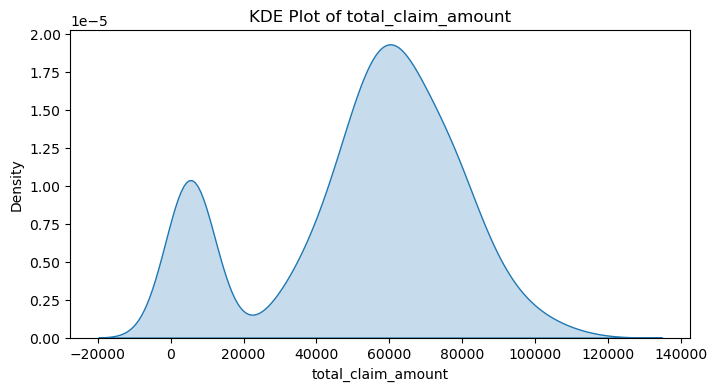

In [19]:
analysis.plot_kde("total_claim_amount")

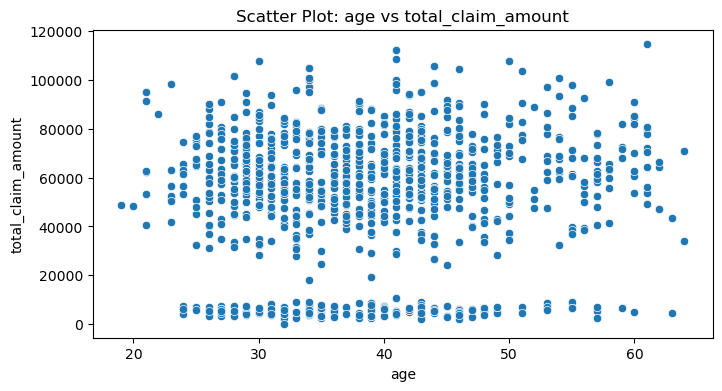

In [95]:
analysis.plot_scatter("age", "total_claim_amount")

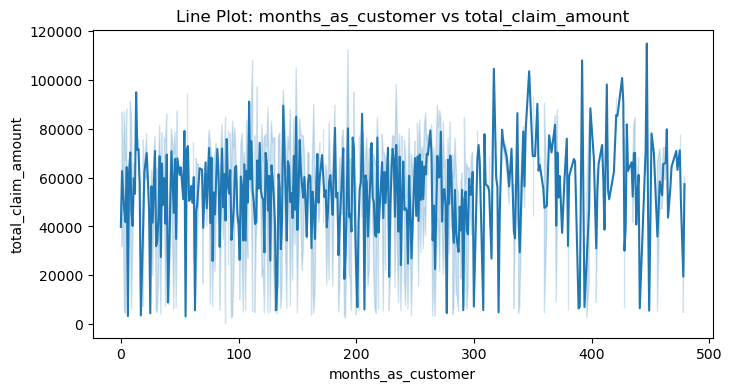

In [96]:
analysis.plot_line("months_as_customer", "total_claim_amount")

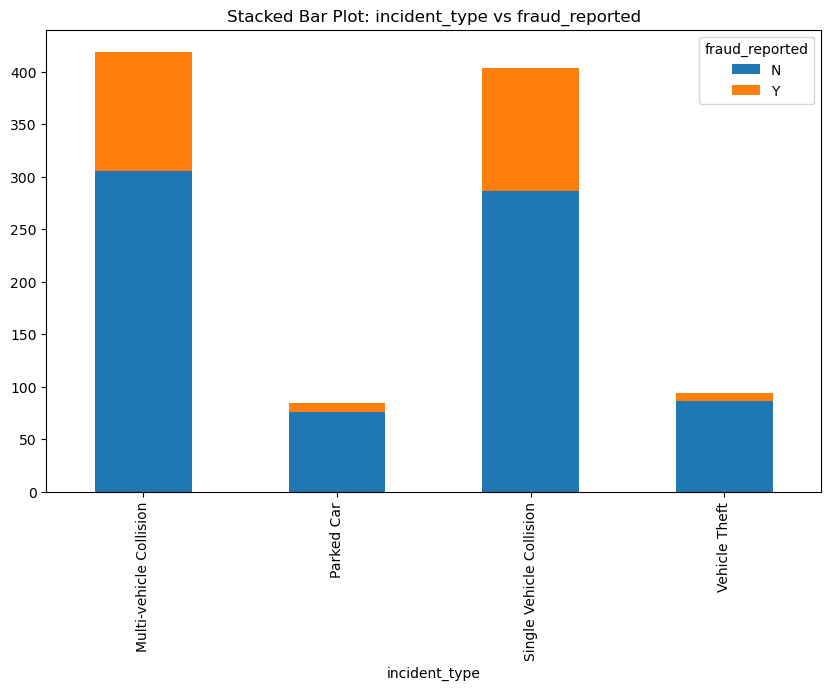

In [97]:
analysis.plot_stacked_bar("incident_type", "fraud_reported")

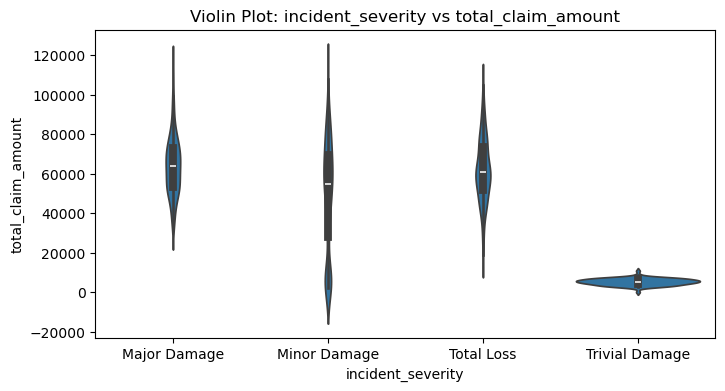

In [98]:
analysis.plot_violin("incident_severity", "total_claim_amount")

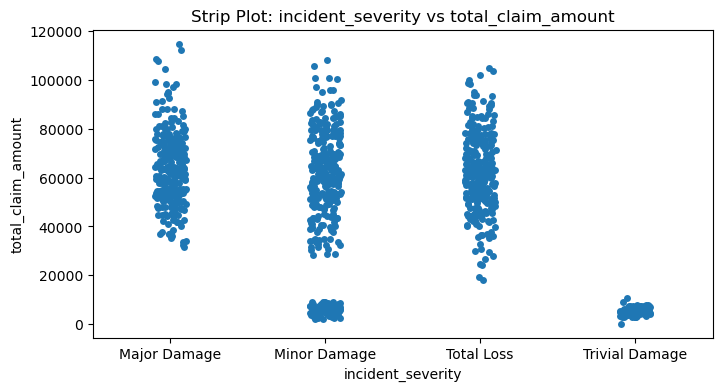

In [99]:
analysis.plot_strip("incident_severity", "total_claim_amount")

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.8% of the points cannot be place

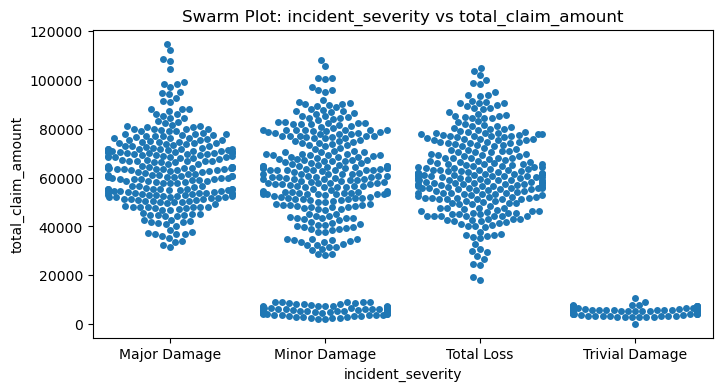

In [28]:
analysis.plot_swarm("incident_severity", "total_claim_amount")

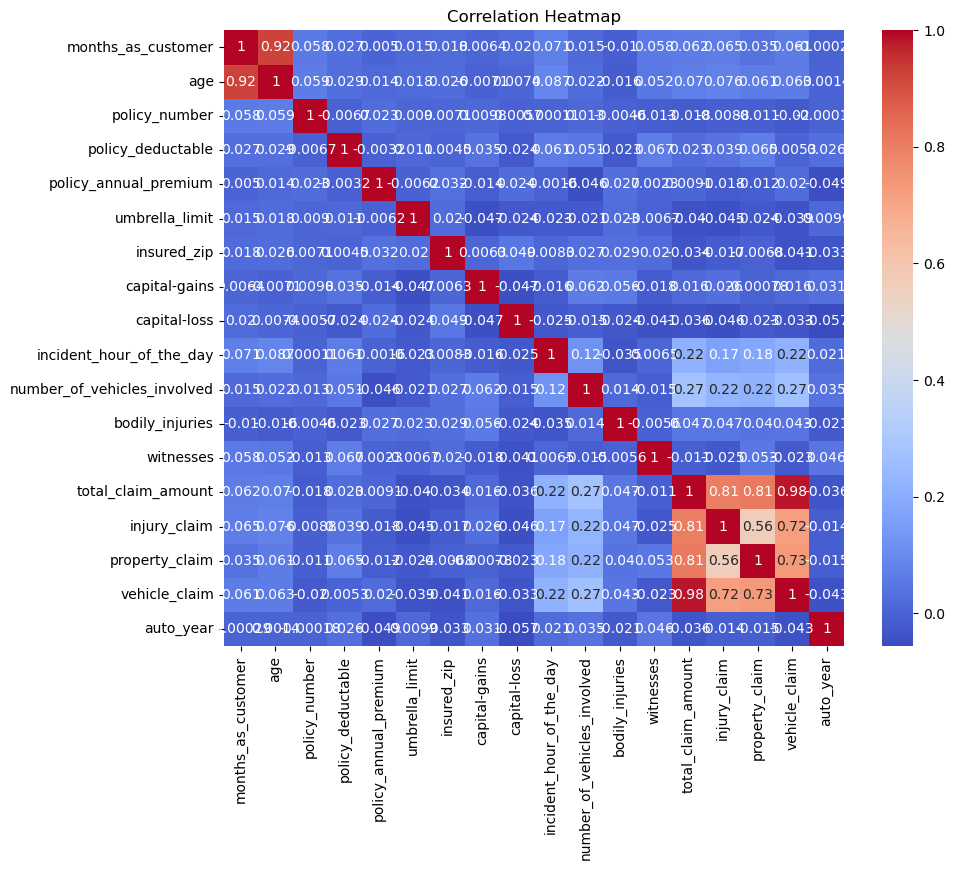

In [29]:
analysis.correlation_heatmap()

In [34]:
analysis.chi_square("fraud_reported", "incident_severity")

5.447033547673865e-57

In [33]:
correlations = analysis.continuous_vs_continuous_correlation()
for col1, col2, corr in correlations:
    print(f"{col1} vs {col2} = {corr:.2f}")

total_claim_amount vs vehicle_claim = 0.98
months_as_customer vs age = 0.92
total_claim_amount vs property_claim = 0.81
total_claim_amount vs injury_claim = 0.81
property_claim vs vehicle_claim = 0.73
injury_claim vs vehicle_claim = 0.72
injury_claim vs property_claim = 0.56
number_of_vehicles_involved vs total_claim_amount = 0.27
number_of_vehicles_involved vs vehicle_claim = 0.27
number_of_vehicles_involved vs injury_claim = 0.22
number_of_vehicles_involved vs property_claim = 0.22
incident_hour_of_the_day vs total_claim_amount = 0.22
incident_hour_of_the_day vs vehicle_claim = 0.22
incident_hour_of_the_day vs property_claim = 0.18
incident_hour_of_the_day vs injury_claim = 0.17
incident_hour_of_the_day vs number_of_vehicles_involved = 0.12
age vs incident_hour_of_the_day = 0.09
age vs injury_claim = 0.08
months_as_customer vs incident_hour_of_the_day = 0.07
age vs total_claim_amount = 0.07
policy_deductable vs witnesses = 0.07
months_as_customer vs injury_claim = 0.07
policy_deducta

In [32]:
analysis.anova_test(target="total_claim_amount")

,Feature,ANOVA_p_value
0,policy_bind_date,0.2071
1,policy_state,0.9638
2,policy_csl,0.0863
3,insured_sex,0.4536
4,insured_education_level,0.3346
5,insured_occupation,0.2009
6,insured_hobbies,0.6123
7,insured_relationship,0.9796
8,incident_date,0.1038
9,incident_type,0.0000


In [31]:
analysis.t_test("fraud_reported", "total_claim_amount")

1.9529359591865865e-07

In [20]:
analysis.save_to_csv("insurance_data.csv")